In [11]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

# Visualization Theory
<!-- requirement: images/visual_variables.jpg -->
<!-- requirement: small_data/goog.json -->
<!-- requirement: images/sample-charts -->

## Different types of data for visualization purposes

For visualization purposes, there are four types of data: **Nominal**, **Ordered**, **Interval**, and **Ratio**.  We give each one below and the associated operations which can be applied to each data type: **Equality**, **Comparison**, **Difference**, **Ratio**:
  
<table>

<tr>
<th>Data Type</th>
<th>Example</th>
<th>Equality</th>
<th>Comparison</th>
<th>Difference</th>
<th>Ratio</th>
</tr>

<tr>
<td>**Nominal**</td>
<td>e.g. countries of the world</td>
<td>`=`,`!=`</td>
<td></td>
<td></td>
<td></td>
</tr>

<tr>
<td>**Ordered**</td>
<td>e.g. bond ratings: A, AA</td>
<td>`=`,`!=`</td>
<td>`>`, `<=`</td>
<td></td>
<td></td>
</tr>

<tr>
<td>**Interval** (location of 0 is arbitrary)</td>
<td>e.g. dates and time, lat-long</td>
<td>`=`,`!=`</td>
<td>`>`, `<=`</td>
<td>`-`</td>
<td></td>
</tr>

<tr>
<td>**Ratio**</td>
<td>e.g. physical measures or values</td>
<td>`=`,`!=`</td>
<td>`>`, `<=`</td>
<td>`-`</td>
<td>`/`</td>
</tr>

</table>



## Seven categories of visual cues
There are seven well-recognized ways of visually encoding data, **Position**, **Size**, **Value** (Saturation or a color), **Texture**, **Color**, **Orientation**, **Shape**.  These are labeled in decreasing order of "accuracy of visual perception."

| Label      | Nominal  | Ordinal | Quantitative (Interval or Ratio) |
| ---------- |:-:|:-:|:-:|
|Position    | N | O | Q |
|Size        |   | O | Q |
|Value       | N | O | Q?|
|Texture     | N | O |   |
|Color       | N | O |   |
|Orientation | N |   |   |
|Shape       | N |   |&nbsp;|


![Categories of Visual Cues](images/visual_variables.jpg)


## Generic algorithm for creating a visualization
Here is the rough algorithm for how to draw a visualization.

1. Express your message in terms of a few quantitative relationships to be expressed (probably no more than 2 and definitely not more than 3).
1. Rank those quantitative relationships.
1. Use the "accuracy of visual perception" and the table above to think about how to encode the data.

In reality, you probably can't follow this algorithm literally but hopefully this can help you better understand what's going on.

## Practical considerations

### Beware of pie charts:

Stay away from pie charts.  A bar chart is almost always the right answer.
<img src="images/sample-charts/pie-vs-bar.png" alt="Pie versus Bar graph" style="width:80%;">
A line chart is better at showing a trend.
<img src="images/sample-charts/pie-vs-line.jpg" alt="Pie versus Line Graph" style="width:80%;">
Unless you are trying to show a part / whole relationship.
<img src="images/sample-charts/part-whole.png" alt="Part versus Whole" style="width:80%;">

Helpful images from [SpeakingPPT.com](http://speakingppt.com/2013/03/18/why-tufte-is-flat-out-wrong-about-pie-charts/).

Another dangerous thing about pie charts is the possibility of distorting the data by removing the absolute scale/reference points.

## Dealing with multiple scales
Often you might want to display data at different scales on the same plot. Interactivity is a good way to go about this, but barring that...

In [1]:
# get GOOG data
import pandas as pd
import simplejson as json

with open('small_data/goog.json') as raw_f:
    raw_data = raw_f.read()
    json_data = json.loads(raw_data)

goog = pd.DataFrame(json_data['data'], columns=json_data['column_names'])
goog['Day'] = goog.index.values
goog.set_index(pd.DatetimeIndex(goog['Date']), inplace=True)

# goog = goog.reset_index(drop=True)

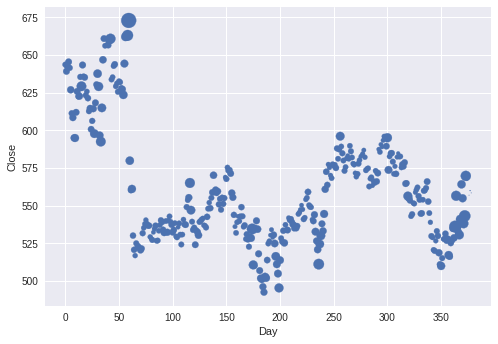

In [5]:
# import matplotlib.pyplot as plt
# plt.scatter(goog.index, goog['Close'])

goog.plot(kind='scatter', x='Day', y='Close', s=goog['Volume']/50000)

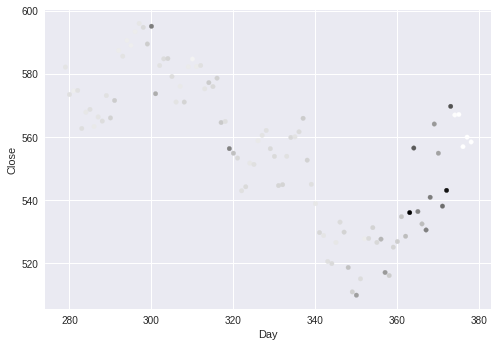

In [7]:
goog_recent = goog[-100:]
goog_recent.plot(kind='scatter', x='Day', y='Close', c=goog_recent['Volume'])

In [8]:
goog['Volume'].describe()

count    3.790000e+02
mean     1.948652e+06
std      1.045658e+06
min      7.900000e+03
25%      1.372076e+06
50%      1.691964e+06
75%      2.182930e+06
max      1.110375e+07
Name: Volume, dtype: float64

In [9]:
goog['Volume_cat'] = goog['Volume'] > goog['Volume'].mean()

## Notes on storytelling

* Narrative is about establish a baseline, then disrupting it
* The "actionable" is what is needed to restore balance
* Why does the audience care?
* Make everyone a stakeholder - "the conflict between what is and what could be" -Nancy Duarte

## Overlaying numbers and labels
It can be easy to clutter a visualization with hard-to-read text - this sci-kit learn [example](http://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html) shows some logic being applied to move labels around in order to avoid overlap.

Also worth noting is the use of color and texture to display additional axes of information. In fact, let's just take a look:

In [10]:
#Disabled because of sklearn versioning
# Author: Gael Varoquaux gael.varoquaux@normalesup.org
# License: BSD 3 clause

import datetime

import numpy as np
import matplotlib.pyplot as plt
try:
    from matplotlib.finance import quotes_historical_yahoo
except ImportError:
    from matplotlib.finance import quotes_historical_yahoo_ochl as quotes_historical_yahoo
from matplotlib.collections import LineCollection

from sklearn import cluster, covariance, manifold

###############################################################################
# Retrieve the data from Internet

# Choose a time period reasonnably calm (not too long ago so that we get
# high-tech firms, and before the 2008 crash)
d1 = datetime.datetime(2003, 1, 1)
d2 = datetime.datetime(2008, 1, 1)

# kraft symbol has now changed from KFT to MDLZ in yahoo
symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'MTU': 'Mitsubishi',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'Mc Donalds',
    'PEP': 'Pepsi',
    'MDLZ': 'Kraft Foods',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas instruments',
    'XRX': 'Xerox',
    'LMT': 'Lookheed Martin',
    'WMT': 'Wal-Mart',
    'WBA': 'Walgreen',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}

symbols, names = np.array(list(symbol_dict.items())).T

quotes = [quotes_historical_yahoo(symbol, d1, d2, asobject=True)
          for symbol in symbols]

open = np.array([q.open for q in quotes]).astype(np.float)
close = np.array([q.close for q in quotes]).astype(np.float)

# The daily variations of the quotes are what carry most information
variation = close - open

###############################################################################
# Learn a graphical structure from the correlations
edge_model = covariance.GraphLassoCV()

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

###############################################################################
# Cluster using affinity propagation

_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

###############################################################################
# Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

###############################################################################
# Visualization
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()


/opt/conda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


URLError: <urlopen error [Errno -2] Name or service not known>

*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*